# Gender Detection using facial features

In [152]:
import keras
from  keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, MaxPool2D
from skimage import io
import os
from matplotlib import pyplot as plt
import glob
import cv2
import numpy as np
from keras.regularizers import l2

image_generators = []


print(tf.__version__)

1.13.1


# Data Preprocessing


# Spliting data in Train, Validation and Testing

In [12]:
import os
import random 
from shutil import copyfile
import re
import os.path

def img_train_test_split(img_source_dir, train_size):
    if not( isinstance(img_source_dir,str)):
        raise AttributeError('img_source_dir must be a string')
    
    if not os.path.exists(img_source_dir):
        raise OSError('img_source_dir does not exists')
        
    if not (isinstance(train_size,float)):
        raise AttributeError('train_size must be a float')
    
    #Set up empty folder structure if not exists
    if not os.path.exists('data'):
        os.makedirs('data')
    else:
        if not os.path.exists('data/train'):
            os.makedirs('data/train')
        if not os.path.exists('data/validation'):
            os.makedirs('data/validation')
        if not os.path.exists('data/test'):
            os.makedirs('data/test')
        
        #Get the subdirectories in the main image folder
        subdirs = [subdir for subdir in os.listdir(img_source_dir) if os.path.isdir(os.path.join(img_source_dir, subdir))]
        
        for subdir in subdirs:
            subdir_fullpath = os.path.join(img_source_dir, subdir)
            if len(os.listdir(subdir_fullpath)) == 0:
                print(subdir_fullpath +'is empty')
                break
            train_subdir = os.path.join('data/train', subdir)
            validation_subdir = os.path.join('data/validation',subdir)
            test_subdir = os.path.join('data/test',subdir)
            
            #create subdirectories in train and validation folders
            if not os.path.exists(train_subdir):
                os.makedirs(train_subdir)
            if not os.path.exists(validation_subdir):
                os.makedirs(validation_subdir)
            if not os.path.exists(test_subdir):
                os.makedirs(test_subdir)
                
            
            train_counter = 0
            validation_counter = 0
            test_counter = 0
            
            #Randomly assign an image to train or validation folder
            for filename in os.listdir(subdir_fullpath):
                    
                if filename.endswith(".jpg"):
                    fileparts = filename.split('.')

                    file_name= [re.search(r"\d+(\.\d+)?", fileparts[0])]
                    file_name = file_name[0].group()
                    

                    if random.uniform(0,1) <= train_size:
                        if is_dir(file_name,validation_subdir):
                            copyfile(os.path.join(subdir_fullpath, filename), os.path.join(validation_subdir,fileparts[0]+'.'+fileparts[1]))
                            validation_counter += 1
                        elif is_dir(file_name,test_subdir):
                            copyfile(os.path.join(subdir_fullpath, filename), os.path.join(test_subdir,fileparts[0]+'.'+fileparts[1]))
                            test_counter += 1

                        else:
                            copyfile(os.path.join(subdir_fullpath, filename), os.path.join(train_subdir,fileparts[0]+'.'+fileparts[1]))
                            train_counter += 1

                    else:
                        if random.uniform(0,1)<=.5:
                            if is_dir(file_name,train_subdir):
                                copyfile(os.path.join(subdir_fullpath, filename), os.path.join(train_subdir,fileparts[0]+'.'+fileparts[1]))
                                train_counter += 1

                            elif is_dir(file_name,test_subdir):
                                copyfile(os.path.join(subdir_fullpath, filename), os.path.join(test_subdir,fileparts[0]+'.'+fileparts[1]))
                                test_counter += 1

                            else:
                                copyfile(os.path.join(subdir_fullpath, filename), os.path.join(validation_subdir,fileparts[0]+'.'+fileparts[1]))
                                validation_counter += 1

                        else:
                            if is_dir(file_name,validation_subdir):
                                copyfile(os.path.join(subdir_fullpath, filename), os.path.join(validation_subdir,fileparts[0]+'.'+fileparts[1]))
                                validation_counter += 1

                            elif is_dir(file_name,train_subdir):
                                copyfile(os.path.join(subdir_fullpath, filename), os.path.join(train_subdir,fileparts[0]+'.'+fileparts[1]))
                                train_counter += 1

                            else:
                                copyfile(os.path.join(subdir_fullpath, filename), os.path.join(test_subdir,fileparts[0]+'.'+fileparts[1]))
                                test_counter += 1
                             
                print('Copied' + str(train_counter)+'image to data/train/' +subdir)
                print('Copied'+ str(validation_counter)+'image to data/validation/'+subdir)

import os
from os import listdir
from os.path import isfile, join
import glob
import re
def is_dir( filename,  target):
#     for filename in os.listdir('./folder'):
#         filename= [re.search(r"\d+(\.\d+)?", filename)]
#     #     print(filename[0].group())
        onlyfiles = [re.search(r"\d+(\.\d+)?",f.split('.')[0]) for f in listdir(target) if isfile(join(target, f))]
        for onlyfile in onlyfiles:
            try:
                if filename == onlyfile.group():
                    return True
            except:
                print("err")
        return False

In [13]:
img_train_test_split('./cropped',0.8)

Copied1image to data/train/female
Copied0image to data/validation/female
Copied2image to data/train/female
Copied0image to data/validation/female
Copied3image to data/train/female
Copied0image to data/validation/female
Copied4image to data/train/female
Copied0image to data/validation/female
Copied5image to data/train/female
Copied0image to data/validation/female
Copied6image to data/train/female
Copied0image to data/validation/female
Copied7image to data/train/female
Copied0image to data/validation/female
Copied8image to data/train/female
Copied0image to data/validation/female
Copied9image to data/train/female
Copied0image to data/validation/female
Copied10image to data/train/female
Copied0image to data/validation/female
Copied11image to data/train/female
Copied0image to data/validation/female
Copied12image to data/train/female
Copied0image to data/validation/female
Copied13image to data/train/female
Copied0image to data/validation/female
Copied14image to data/train/female
Copied0image

Copied97image to data/train/female
Copied10image to data/validation/female
Copied98image to data/train/female
Copied10image to data/validation/female
Copied99image to data/train/female
Copied10image to data/validation/female
Copied100image to data/train/female
Copied10image to data/validation/female
Copied101image to data/train/female
Copied10image to data/validation/female
Copied102image to data/train/female
Copied10image to data/validation/female
Copied103image to data/train/female
Copied10image to data/validation/female
Copied104image to data/train/female
Copied10image to data/validation/female
Copied105image to data/train/female
Copied10image to data/validation/female
Copied106image to data/train/female
Copied10image to data/validation/female
Copied107image to data/train/female
Copied10image to data/validation/female
Copied108image to data/train/female
Copied10image to data/validation/female
Copied109image to data/train/female
Copied10image to data/validation/female
Copied110image 

Copied168image to data/train/female
Copied41image to data/validation/female
Copied169image to data/train/female
Copied41image to data/validation/female
Copied170image to data/train/female
Copied41image to data/validation/female
Copied171image to data/train/female
Copied41image to data/validation/female
Copied172image to data/train/female
Copied41image to data/validation/female
Copied173image to data/train/female
Copied41image to data/validation/female
Copied174image to data/train/female
Copied41image to data/validation/female
Copied175image to data/train/female
Copied41image to data/validation/female
Copied176image to data/train/female
Copied41image to data/validation/female
Copied177image to data/train/female
Copied41image to data/validation/female
Copied178image to data/train/female
Copied41image to data/validation/female
Copied179image to data/train/female
Copied41image to data/validation/female
Copied180image to data/train/female
Copied41image to data/validation/female
Copied181ima

Copied283image to data/train/female
Copied41image to data/validation/female
Copied284image to data/train/female
Copied41image to data/validation/female
Copied285image to data/train/female
Copied41image to data/validation/female
Copied286image to data/train/female
Copied41image to data/validation/female
Copied287image to data/train/female
Copied41image to data/validation/female
Copied288image to data/train/female
Copied41image to data/validation/female
Copied289image to data/train/female
Copied41image to data/validation/female
Copied290image to data/train/female
Copied41image to data/validation/female
Copied291image to data/train/female
Copied41image to data/validation/female
Copied292image to data/train/female
Copied41image to data/validation/female
Copied293image to data/train/female
Copied41image to data/validation/female
Copied293image to data/train/female
Copied41image to data/validation/female
Copied293image to data/train/female
Copied41image to data/validation/female
Copied293ima

Copied344image to data/train/female
Copied61image to data/validation/female
Copied344image to data/train/female
Copied62image to data/validation/female
Copied344image to data/train/female
Copied63image to data/validation/female
Copied344image to data/train/female
Copied64image to data/validation/female
Copied344image to data/train/female
Copied65image to data/validation/female
Copied344image to data/train/female
Copied66image to data/validation/female
Copied344image to data/train/female
Copied67image to data/validation/female
Copied344image to data/train/female
Copied68image to data/validation/female
Copied344image to data/train/female
Copied69image to data/validation/female
Copied344image to data/train/female
Copied70image to data/validation/female
Copied344image to data/train/female
Copied71image to data/validation/female
Copied344image to data/train/female
Copied72image to data/validation/female
Copied344image to data/train/female
Copied73image to data/validation/female
Copied344ima

Copied409image to data/train/female
Copied76image to data/validation/female
Copied409image to data/train/female
Copied76image to data/validation/female
Copied409image to data/train/female
Copied76image to data/validation/female
Copied410image to data/train/female
Copied76image to data/validation/female
Copied411image to data/train/female
Copied76image to data/validation/female
Copied412image to data/train/female
Copied76image to data/validation/female
Copied413image to data/train/female
Copied76image to data/validation/female
Copied414image to data/train/female
Copied76image to data/validation/female
Copied415image to data/train/female
Copied76image to data/validation/female
Copied416image to data/train/female
Copied76image to data/validation/female
Copied417image to data/train/female
Copied76image to data/validation/female
Copied418image to data/train/female
Copied76image to data/validation/female
Copied419image to data/train/female
Copied76image to data/validation/female
Copied420ima

Copied512image to data/train/female
Copied76image to data/validation/female
Copied512image to data/train/female
Copied76image to data/validation/female
Copied512image to data/train/female
Copied76image to data/validation/female
Copied512image to data/train/female
Copied76image to data/validation/female
Copied512image to data/train/female
Copied76image to data/validation/female
Copied512image to data/train/female
Copied76image to data/validation/female
Copied512image to data/train/female
Copied76image to data/validation/female
Copied512image to data/train/female
Copied76image to data/validation/female
Copied512image to data/train/female
Copied76image to data/validation/female
Copied513image to data/train/female
Copied76image to data/validation/female
Copied514image to data/train/female
Copied76image to data/validation/female
Copied515image to data/train/female
Copied76image to data/validation/female
Copied516image to data/train/female
Copied76image to data/validation/female
Copied517ima

Copied598image to data/train/female
Copied76image to data/validation/female
Copied599image to data/train/female
Copied76image to data/validation/female
Copied600image to data/train/female
Copied76image to data/validation/female
Copied601image to data/train/female
Copied76image to data/validation/female
Copied601image to data/train/female
Copied77image to data/validation/female
Copied601image to data/train/female
Copied78image to data/validation/female
Copied601image to data/train/female
Copied79image to data/validation/female
Copied601image to data/train/female
Copied80image to data/validation/female
Copied601image to data/train/female
Copied81image to data/validation/female
Copied601image to data/train/female
Copied82image to data/validation/female
Copied601image to data/train/female
Copied83image to data/validation/female
Copied601image to data/train/female
Copied84image to data/validation/female
Copied601image to data/train/female
Copied85image to data/validation/female
Copied601ima

Copied669image to data/train/female
Copied87image to data/validation/female
Copied670image to data/train/female
Copied87image to data/validation/female
Copied671image to data/train/female
Copied87image to data/validation/female
Copied672image to data/train/female
Copied87image to data/validation/female
Copied673image to data/train/female
Copied87image to data/validation/female
Copied674image to data/train/female
Copied87image to data/validation/female
Copied675image to data/train/female
Copied87image to data/validation/female
Copied676image to data/train/female
Copied87image to data/validation/female
Copied677image to data/train/female
Copied87image to data/validation/female
Copied678image to data/train/female
Copied87image to data/validation/female
Copied679image to data/train/female
Copied87image to data/validation/female
Copied680image to data/train/female
Copied87image to data/validation/female
Copied681image to data/train/female
Copied87image to data/validation/female
Copied682ima

Copied766image to data/train/female
Copied87image to data/validation/female
Copied767image to data/train/female
Copied87image to data/validation/female
Copied767image to data/train/female
Copied88image to data/validation/female
Copied767image to data/train/female
Copied89image to data/validation/female
Copied767image to data/train/female
Copied90image to data/validation/female
Copied767image to data/train/female
Copied91image to data/validation/female
Copied767image to data/train/female
Copied92image to data/validation/female
Copied767image to data/train/female
Copied93image to data/validation/female
Copied767image to data/train/female
Copied94image to data/validation/female
Copied767image to data/train/female
Copied95image to data/validation/female
Copied767image to data/train/female
Copied96image to data/validation/female
Copied767image to data/train/female
Copied97image to data/validation/female
Copied767image to data/train/female
Copied98image to data/validation/female
Copied767ima

Copied830image to data/train/female
Copied116image to data/validation/female
Copied831image to data/train/female
Copied116image to data/validation/female
Copied832image to data/train/female
Copied116image to data/validation/female
Copied833image to data/train/female
Copied116image to data/validation/female
Copied834image to data/train/female
Copied116image to data/validation/female
Copied835image to data/train/female
Copied116image to data/validation/female
Copied836image to data/train/female
Copied116image to data/validation/female
Copied837image to data/train/female
Copied116image to data/validation/female
Copied838image to data/train/female
Copied116image to data/validation/female
Copied839image to data/train/female
Copied116image to data/validation/female
Copied840image to data/train/female
Copied116image to data/validation/female
Copied841image to data/train/female
Copied116image to data/validation/female
Copied842image to data/train/female
Copied116image to data/validation/female

Copied912image to data/train/female
Copied142image to data/validation/female
Copied912image to data/train/female
Copied143image to data/validation/female
Copied912image to data/train/female
Copied144image to data/validation/female
Copied912image to data/train/female
Copied145image to data/validation/female
Copied912image to data/train/female
Copied146image to data/validation/female
Copied912image to data/train/female
Copied147image to data/validation/female
Copied912image to data/train/female
Copied147image to data/validation/female
Copied912image to data/train/female
Copied147image to data/validation/female
Copied912image to data/train/female
Copied147image to data/validation/female
Copied912image to data/train/female
Copied147image to data/validation/female
Copied912image to data/train/female
Copied147image to data/validation/female
Copied912image to data/train/female
Copied147image to data/validation/female
Copied912image to data/train/female
Copied147image to data/validation/female

Copied1036image to data/train/female
Copied174image to data/validation/female
Copied1037image to data/train/female
Copied174image to data/validation/female
Copied1038image to data/train/female
Copied174image to data/validation/female
Copied1039image to data/train/female
Copied174image to data/validation/female
Copied1040image to data/train/female
Copied174image to data/validation/female
Copied1041image to data/train/female
Copied174image to data/validation/female
Copied1042image to data/train/female
Copied174image to data/validation/female
Copied1043image to data/train/female
Copied174image to data/validation/female
Copied1044image to data/train/female
Copied174image to data/validation/female
Copied1045image to data/train/female
Copied174image to data/validation/female
Copied1046image to data/train/female
Copied174image to data/validation/female
Copied1047image to data/train/female
Copied174image to data/validation/female
Copied1048image to data/train/female
Copied174image to data/vali

Copied192image to data/validation/female
Copied1124image to data/train/female
Copied192image to data/validation/female
Copied1125image to data/train/female
Copied192image to data/validation/female
Copied1126image to data/train/female
Copied192image to data/validation/female
Copied1127image to data/train/female
Copied192image to data/validation/female
Copied1128image to data/train/female
Copied192image to data/validation/female
Copied1129image to data/train/female
Copied192image to data/validation/female
Copied1130image to data/train/female
Copied192image to data/validation/female
Copied1131image to data/train/female
Copied192image to data/validation/female
Copied1132image to data/train/female
Copied192image to data/validation/female
Copied1133image to data/train/female
Copied192image to data/validation/female
Copied1134image to data/train/female
Copied192image to data/validation/female
Copied1135image to data/train/female
Copied192image to data/validation/female
Copied1136image to data

Copied1210image to data/train/female
Copied202image to data/validation/female
Copied1211image to data/train/female
Copied202image to data/validation/female
Copied1212image to data/train/female
Copied202image to data/validation/female
Copied1213image to data/train/female
Copied202image to data/validation/female
Copied1214image to data/train/female
Copied202image to data/validation/female
Copied1215image to data/train/female
Copied202image to data/validation/female
Copied1216image to data/train/female
Copied202image to data/validation/female
Copied1217image to data/train/female
Copied202image to data/validation/female
Copied1218image to data/train/female
Copied202image to data/validation/female
Copied1219image to data/train/female
Copied202image to data/validation/female
Copied1220image to data/train/female
Copied202image to data/validation/female
Copied1221image to data/train/female
Copied202image to data/validation/female
Copied1222image to data/train/female
Copied202image to data/vali

Copied60image to data/train/male
Copied13image to data/validation/male
Copied61image to data/train/male
Copied13image to data/validation/male
Copied62image to data/train/male
Copied13image to data/validation/male
Copied63image to data/train/male
Copied13image to data/validation/male
Copied64image to data/train/male
Copied13image to data/validation/male
Copied65image to data/train/male
Copied13image to data/validation/male
Copied66image to data/train/male
Copied13image to data/validation/male
Copied67image to data/train/male
Copied13image to data/validation/male
Copied68image to data/train/male
Copied13image to data/validation/male
Copied69image to data/train/male
Copied13image to data/validation/male
Copied70image to data/train/male
Copied13image to data/validation/male
Copied71image to data/train/male
Copied13image to data/validation/male
Copied72image to data/train/male
Copied13image to data/validation/male
Copied73image to data/train/male
Copied13image to data/validation/male
Copied

Copied175image to data/train/male
Copied13image to data/validation/male
Copied176image to data/train/male
Copied13image to data/validation/male
Copied177image to data/train/male
Copied13image to data/validation/male
Copied178image to data/train/male
Copied13image to data/validation/male
Copied179image to data/train/male
Copied13image to data/validation/male
Copied180image to data/train/male
Copied13image to data/validation/male
Copied181image to data/train/male
Copied13image to data/validation/male
Copied182image to data/train/male
Copied13image to data/validation/male
Copied183image to data/train/male
Copied13image to data/validation/male
Copied184image to data/train/male
Copied13image to data/validation/male
Copied185image to data/train/male
Copied13image to data/validation/male
Copied186image to data/train/male
Copied13image to data/validation/male
Copied187image to data/train/male
Copied13image to data/validation/male
Copied188image to data/train/male
Copied13image to data/validati

Copied251image to data/train/male
Copied53image to data/validation/male
Copied252image to data/train/male
Copied53image to data/validation/male
Copied253image to data/train/male
Copied53image to data/validation/male
Copied254image to data/train/male
Copied53image to data/validation/male
Copied255image to data/train/male
Copied53image to data/validation/male
Copied256image to data/train/male
Copied53image to data/validation/male
Copied257image to data/train/male
Copied53image to data/validation/male
Copied258image to data/train/male
Copied53image to data/validation/male
Copied259image to data/train/male
Copied53image to data/validation/male
Copied260image to data/train/male
Copied53image to data/validation/male
Copied261image to data/train/male
Copied53image to data/validation/male
Copied262image to data/train/male
Copied53image to data/validation/male
Copied263image to data/train/male
Copied53image to data/validation/male
Copied264image to data/train/male
Copied53image to data/validati

Copied354image to data/train/male
Copied64image to data/validation/male
Copied354image to data/train/male
Copied64image to data/validation/male
Copied354image to data/train/male
Copied64image to data/validation/male
Copied354image to data/train/male
Copied64image to data/validation/male
Copied354image to data/train/male
Copied64image to data/validation/male
Copied354image to data/train/male
Copied64image to data/validation/male
Copied354image to data/train/male
Copied64image to data/validation/male
Copied354image to data/train/male
Copied64image to data/validation/male
Copied354image to data/train/male
Copied64image to data/validation/male
Copied354image to data/train/male
Copied64image to data/validation/male
Copied354image to data/train/male
Copied64image to data/validation/male
Copied354image to data/train/male
Copied64image to data/validation/male
Copied354image to data/train/male
Copied64image to data/validation/male
Copied354image to data/train/male
Copied64image to data/validati

Copied89image to data/validation/male
Copied433image to data/train/male
Copied89image to data/validation/male
Copied434image to data/train/male
Copied89image to data/validation/male
Copied435image to data/train/male
Copied89image to data/validation/male
Copied436image to data/train/male
Copied89image to data/validation/male
Copied436image to data/train/male
Copied89image to data/validation/male
Copied436image to data/train/male
Copied89image to data/validation/male
Copied436image to data/train/male
Copied89image to data/validation/male
Copied436image to data/train/male
Copied89image to data/validation/male
Copied436image to data/train/male
Copied89image to data/validation/male
Copied436image to data/train/male
Copied89image to data/validation/male
Copied436image to data/train/male
Copied89image to data/validation/male
Copied436image to data/train/male
Copied89image to data/validation/male
Copied436image to data/train/male
Copied89image to data/validation/male
Copied436image to data/tra

Copied519image to data/train/male
Copied104image to data/validation/male
Copied520image to data/train/male
Copied104image to data/validation/male
Copied521image to data/train/male
Copied104image to data/validation/male
Copied522image to data/train/male
Copied104image to data/validation/male
Copied523image to data/train/male
Copied104image to data/validation/male
Copied524image to data/train/male
Copied104image to data/validation/male
Copied525image to data/train/male
Copied104image to data/validation/male
Copied526image to data/train/male
Copied104image to data/validation/male
Copied527image to data/train/male
Copied104image to data/validation/male
Copied528image to data/train/male
Copied104image to data/validation/male
Copied529image to data/train/male
Copied104image to data/validation/male
Copied530image to data/train/male
Copied104image to data/validation/male
Copied531image to data/train/male
Copied104image to data/validation/male
Copied532image to data/train/male
Copied104image to

Copied633image to data/train/male
Copied104image to data/validation/male
Copied634image to data/train/male
Copied104image to data/validation/male
Copied635image to data/train/male
Copied104image to data/validation/male
Copied636image to data/train/male
Copied104image to data/validation/male
Copied637image to data/train/male
Copied104image to data/validation/male
Copied638image to data/train/male
Copied104image to data/validation/male
Copied639image to data/train/male
Copied104image to data/validation/male
Copied640image to data/train/male
Copied104image to data/validation/male
Copied641image to data/train/male
Copied104image to data/validation/male
Copied642image to data/train/male
Copied104image to data/validation/male
Copied643image to data/train/male
Copied104image to data/validation/male
Copied644image to data/train/male
Copied104image to data/validation/male
Copied645image to data/train/male
Copied104image to data/validation/male
Copied646image to data/train/male
Copied104image to

Copied831image to data/train/male
Copied119image to data/validation/male
Copied832image to data/train/male
Copied119image to data/validation/male
Copied833image to data/train/male
Copied119image to data/validation/male
Copied834image to data/train/male
Copied119image to data/validation/male
Copied835image to data/train/male
Copied119image to data/validation/male
Copied836image to data/train/male
Copied119image to data/validation/male
Copied837image to data/train/male
Copied119image to data/validation/male
Copied838image to data/train/male
Copied119image to data/validation/male
Copied839image to data/train/male
Copied119image to data/validation/male
Copied840image to data/train/male
Copied119image to data/validation/male
Copied841image to data/train/male
Copied119image to data/validation/male
Copied842image to data/train/male
Copied119image to data/validation/male
Copied843image to data/train/male
Copied119image to data/validation/male
Copied844image to data/train/male
Copied119image to

Copied924image to data/train/male
Copied119image to data/validation/male
Copied924image to data/train/male
Copied119image to data/validation/male
Copied924image to data/train/male
Copied119image to data/validation/male
Copied924image to data/train/male
Copied119image to data/validation/male
Copied924image to data/train/male
Copied119image to data/validation/male
Copied924image to data/train/male
Copied119image to data/validation/male
Copied924image to data/train/male
Copied119image to data/validation/male
Copied924image to data/train/male
Copied119image to data/validation/male
Copied924image to data/train/male
Copied119image to data/validation/male
Copied924image to data/train/male
Copied120image to data/validation/male
Copied924image to data/train/male
Copied121image to data/validation/male
Copied924image to data/train/male
Copied122image to data/validation/male
Copied924image to data/train/male
Copied123image to data/validation/male
Copied924image to data/train/male
Copied124image to

Copied1005image to data/train/male
Copied131image to data/validation/male
Copied1006image to data/train/male
Copied131image to data/validation/male
Copied1007image to data/train/male
Copied131image to data/validation/male
Copied1008image to data/train/male
Copied131image to data/validation/male
Copied1009image to data/train/male
Copied131image to data/validation/male
Copied1010image to data/train/male
Copied131image to data/validation/male
Copied1011image to data/train/male
Copied131image to data/validation/male
Copied1012image to data/train/male
Copied131image to data/validation/male
Copied1013image to data/train/male
Copied131image to data/validation/male
Copied1014image to data/train/male
Copied131image to data/validation/male
Copied1015image to data/train/male
Copied131image to data/validation/male
Copied1016image to data/train/male
Copied131image to data/validation/male
Copied1017image to data/train/male
Copied131image to data/validation/male
Copied1018image to data/train/male
Cop

Copied1097image to data/train/male
Copied131image to data/validation/male
Copied1097image to data/train/male
Copied131image to data/validation/male
Copied1097image to data/train/male
Copied131image to data/validation/male
Copied1097image to data/train/male
Copied131image to data/validation/male
Copied1097image to data/train/male
Copied131image to data/validation/male
Copied1097image to data/train/male
Copied131image to data/validation/male
Copied1097image to data/train/male
Copied131image to data/validation/male
Copied1097image to data/train/male
Copied131image to data/validation/male
Copied1097image to data/train/male
Copied131image to data/validation/male
Copied1097image to data/train/male
Copied131image to data/validation/male
Copied1097image to data/train/male
Copied131image to data/validation/male
Copied1097image to data/train/male
Copied131image to data/validation/male
Copied1097image to data/train/male
Copied131image to data/validation/male
Copied1097image to data/train/male
Cop

Copied1189image to data/train/male
Copied131image to data/validation/male
Copied1190image to data/train/male
Copied131image to data/validation/male
Copied1191image to data/train/male
Copied131image to data/validation/male
Copied1192image to data/train/male
Copied131image to data/validation/male
Copied1193image to data/train/male
Copied131image to data/validation/male
Copied1194image to data/train/male
Copied131image to data/validation/male
Copied1195image to data/train/male
Copied131image to data/validation/male
Copied1196image to data/train/male
Copied131image to data/validation/male
Copied1197image to data/train/male
Copied131image to data/validation/male
Copied1198image to data/train/male
Copied131image to data/validation/male
Copied1199image to data/train/male
Copied131image to data/validation/male
Copied1200image to data/train/male
Copied131image to data/validation/male
Copied1201image to data/train/male
Copied131image to data/validation/male
Copied1202image to data/train/male
Cop

Copied1290image to data/train/male
Copied131image to data/validation/male
Copied1291image to data/train/male
Copied131image to data/validation/male
Copied1292image to data/train/male
Copied131image to data/validation/male
Copied1293image to data/train/male
Copied131image to data/validation/male
Copied1294image to data/train/male
Copied131image to data/validation/male
Copied1295image to data/train/male
Copied131image to data/validation/male
Copied1296image to data/train/male
Copied131image to data/validation/male
Copied1297image to data/train/male
Copied131image to data/validation/male
Copied1297image to data/train/male
Copied131image to data/validation/male
Copied1297image to data/train/male
Copied131image to data/validation/male
Copied1297image to data/train/male
Copied131image to data/validation/male
Copied1297image to data/train/male
Copied131image to data/validation/male
Copied1297image to data/train/male
Copied131image to data/validation/male
Copied1297image to data/train/male
Cop


# Preparing train data

In [29]:
input_size = [64,64]
batch_size = 32
steps_per_epoch =100






train_datagen = ImageDataGenerator(
        rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    './data/train',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary',
    interpolation='bilinear')
validation_generator = test_datagen.flow_from_directory(
        './data/validation',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary',
        interpolation='bilinear')




Found 2582 images belonging to 2 classes.
Found 348 images belonging to 2 classes.


# Creating CNN Model

In [136]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


model.compile(loss='binary_crossentropy',optimizer = 'Adam',metrics=['accuracy'])


# Model Summary

In [137]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 128)         147584    
__________

# Training CNN Model

In [30]:
num_epochs = 100
steps_per_epochs = 90
validiaton_steps=12
history = model.fit_generator(
    train_generator,
    steps_per_epoch=90,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=11)


Epoch 1/100
90/90 [==============================] - 26s 292ms/step - loss: 0.1522 - acc: 0.9460 - val_loss: 0.3343 - val_acc: 0.8534
Epoch 2/100
90/90 [==============================] - 28s 312ms/step - loss: 0.0697 - acc: 0.9776 - val_loss: 0.3568 - val_acc: 0.8563
Epoch 3/100
90/90 [==============================] - 33s 366ms/step - loss: 0.0549 - acc: 0.9794 - val_loss: 0.4311 - val_acc: 0.8333
Epoch 4/100
90/90 [==============================] - 28s 307ms/step - loss: 0.0338 - acc: 0.9880 - val_loss: 0.5646 - val_acc: 0.8506
Epoch 5/100
90/90 [==============================] - 25s 281ms/step - loss: 0.0190 - acc: 0.9955 - val_loss: 0.5083 - val_acc: 0.8305
Epoch 6/100
90/90 [==============================] - 24s 268ms/step - loss: 0.0332 - acc: 0.9892 - val_loss: 0.3456 - val_acc: 0.8362
Epoch 7/100
90/90 [==============================] - 24s 270ms/step - loss: 0.0102 - acc: 0.9979 - val_loss: 0.7426 - val_acc: 0.8190
Epoch 8/100
90/90 [==============================] - 24s 268ms

# Visualizing Model Accuracy 

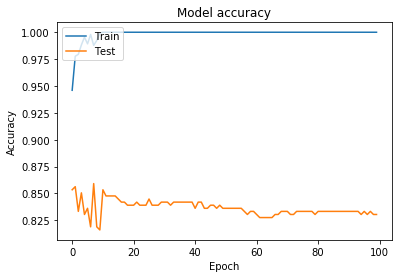

In [31]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



# Visualizing Model Loss

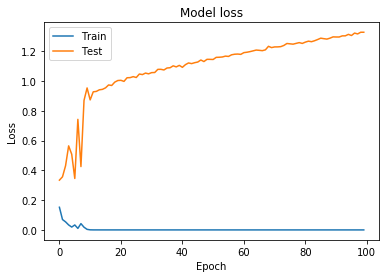

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Save the Model

In [33]:
from keras.models import load_model

model.save('Gender_v2.h5') 

# Load the Model

In [27]:
from keras.models import load_model

model = load_model('Gender_v1.h5')

# Accuracy for Female

In [36]:
import os
from matplotlib import pyplot as plt
import glob
import cv2
import numpy as np
imageCollection = []
image_sized = np.random.random([245,64,64,3])
image = [cv2.imread(file) for file in glob.glob("./data/test/female/*.jpg")]
# plt.imshow(image[0])
for i in range(245):  
    image_sized[i] = cv2.resize(image[i], (64,64))
predict = model.predict(image_sized)


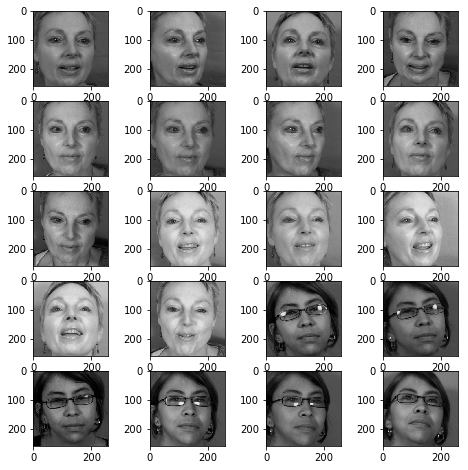

In [33]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(image[i])
plt.show()

0.8530612244897959


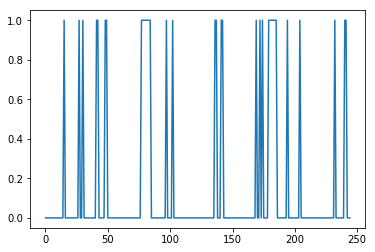

In [41]:
count = 0
errors=[0]*245
errors = np.array(errors)

# for i in predict:
#     if i[0] >0.5:
#         count=count+1
for i in range(245):
    if predict[i]<0.5:
        count = count+1
    else: 
        errors[i] = i
errors = np.argwhere(errors)
print(count/245)
plt.plot(predict)

# Visualizing Female Errors

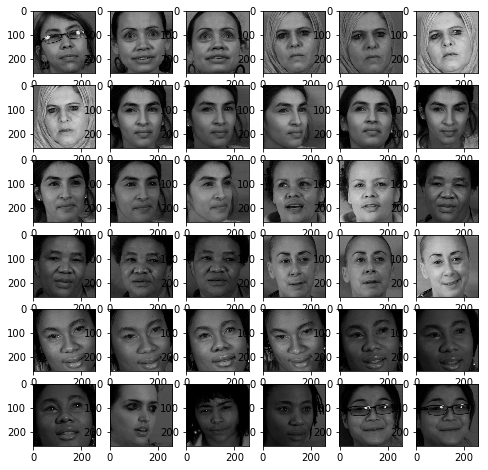

In [42]:
import math
images_errors = np.random.random([len(errors),259,259,3]) 
for i in range(len(errors)):
    images_errors[i] = image[errors[i][0]]

w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = int(math.sqrt(len(errors)))
rows =int(math.sqrt(len(errors)))
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(images_errors[i-1].astype('uint8'))
plt.show()


# Accuracy for Male

In [85]:
import os
from matplotlib import pyplot as plt
import glob
import cv2
import numpy as np
imageCollection = []
image_sized = np.random.random([172,64,64,3])
image = [cv2.imread(file) for file in glob.glob("./data/test/male/*.jpg")]
# plt.imshow(image[0])
for i in range(172):  
    image_sized[i] = cv2.resize(image[i], (64,64))
predict = model.predict(image_sized)


IndexError: list index out of range

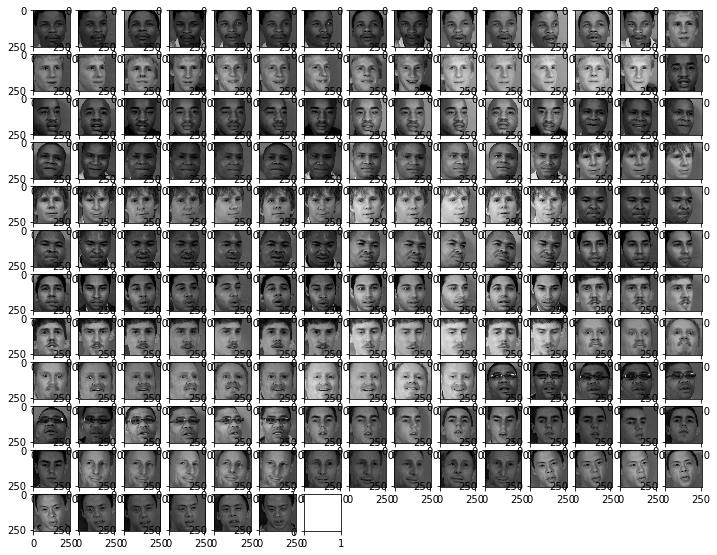

In [86]:
w=6
h=6
fig=plt.figure(figsize=(12, 12))
columns = 15
rows = 15
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(image[i])
plt.show()

The Accuray is:  0.8604651162790697


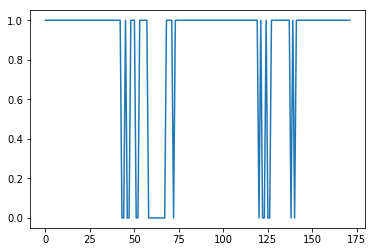

In [48]:
count = 0
total=172
errors=[0]*172
errors = np.array(errors)

# for i in predict:
#     if i[0] >0.5:
#         count=count+1
for i in range(172):
    if predict[i]>0.5:
        count = count+1
    else: 
        errors[i] = i
errors = np.argwhere(errors)
print("The Accuray is: ",count/total)
plt.plot(predict)

# Visualize the errors

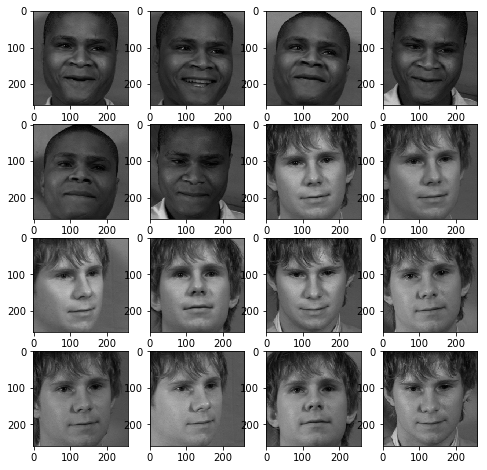

In [49]:
import math
images_errors = np.random.random([25,259,259,3]) 
for i in range(len(errors)):
    images_errors[i] = image[errors[i][0]]

w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = int(math.sqrt(len(errors)))
rows =int(math.sqrt(len(errors)))
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(images_errors[i-1].astype('uint8'))
plt.show()


# WEBCAM


In [176]:
len(errors)

24

In [177]:
import cv2
import numpy as np
import dlib


# model = load_model('my_model_last1.h5')

cap = cv2.VideoCapture(0)
detector = dlib.get_frontal_face_detector()

def predict_gender(image):
   
    image_sized = np.random.random([1,64,64,3])
    image_sized[0] = cv2.resize(image, (64,64))
    predict = model.predict(image_sized)
    if predict>0.5:
        cv2.putText(frame, "Male", (200, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255))
        print("male")
    
    else :
        cv2.putText(frame, "Female", (200, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255))
        print("female")
    cv2.imshow("Frame",frame)
x1  = None
y1  = None
x2  = None
y2  = None
cap = cv2.VideoCapture(0)
detector = dlib.get_frontal_face_detector()
while True:
    _, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)
    for face in faces:
        x1 = face.left()-4
        y1 = face.top()-4
        x2 = face.right()+4
        y2 = face.bottom()+4
        cv2.rectangle(frame,(x1,y1),(x2,y2),(0,255,0),3)
#         print(face)
    
#     print(frame)
    if y1!= None and y2!=None and x2!=None and x1!= None:
        predict_gender(frame[ y1:y1+y2, x1:x1+x2])
    key = cv2.waitKey(1)
    if key== 27:
        break

male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
female
female
female
female
female
male
male
female
female
female
female
female
female
female
female
female
female
female
male
female
female
female
female
female
female
female

female
female
female
female
female
female
female
female
female
female
female
female
female
female
female
female
female
female
female
female
female
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
female
female
male
female
female
female
female
female
female
female
female
female
male
male
male
male
female
female
female
female
female
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
male
m

# Data Augmentation 

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               42467840  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total para

In [34]:
num_epochs = 100
steps_per_epochs = 900
validiaton_steps=120
history = model.fit_generator(
    train_generator,
    steps_per_epoch=90,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=11)


Epoch 1/20
90/90 [==============================] - 182s 2s/step - loss: 0.8119 - acc: 0.7823 - val_loss: 0.5283 - val_acc: 0.8450
Epoch 2/20
90/90 [==============================] - 164s 2s/step - loss: 0.3608 - acc: 0.9294 - val_loss: 0.6965 - val_acc: 0.8160
Epoch 3/20
90/90 [==============================] - 165s 2s/step - loss: 0.2748 - acc: 0.9576 - val_loss: 0.4692 - val_acc: 0.8640
Epoch 4/20
90/90 [==============================] - 162s 2s/step - loss: 0.2226 - acc: 0.9768 - val_loss: 0.4225 - val_acc: 0.8699
Epoch 5/20
90/90 [==============================] - 162s 2s/step - loss: 0.1809 - acc: 0.9865 - val_loss: 0.6830 - val_acc: 0.8121
Epoch 6/20
90/90 [==============================] - 162s 2s/step - loss: 0.1403 - acc: 0.9951 - val_loss: 0.4321 - val_acc: 0.8844
Epoch 7/20
90/90 [==============================] - 163s 2s/step - loss: 0.1183 - acc: 0.9972 - val_loss: 0.4387 - val_acc: 0.8855
Epoch 8/20
90/90 [==============================] - 162s 2s/step - loss: 0.1097 - a

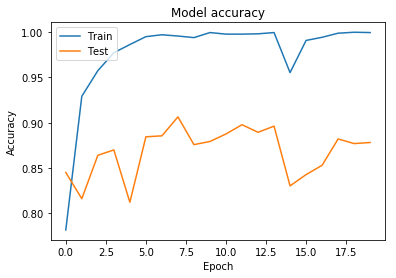

In [35]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

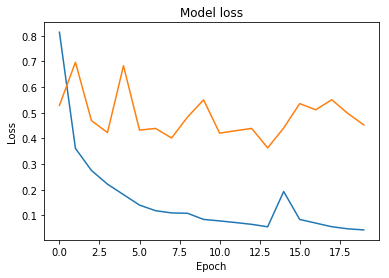

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# plt.legend(['Trafrom keras.models import load_model

# model.save('Gender_v2.h5') in', 'Test'], loc='upper left')
plt.show()

In [6]:
from keras.models import load_model

model.save('Gender_v4.h5') 

AttributeError: 'Sequential' object has no attribute 'load_model'

In [73]:
from keras.models import load_model

model = load_model('Gender_v1.h5')

In [59]:
import os
from matplotlib import pyplot as plt
import glob
import cv2
import numpy as np
imageCollection = []
image_sized = np.random.random([172,64,64,3])
image = [cv2.imread(file) for file in glob.glob("./data/test/male/*.jpg")]
# plt.imshow(image[0])
for i in range(172):  
    image_sized[i] = cv2.resize(image[i], (64,64))
predict = model.predict(image_sized)

0.8604651162790697


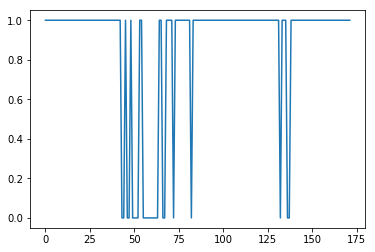

In [60]:
count = 0
errors=[0]*245
errors = np.array(errors)
total =172
# for i in predict:
#     if i[0] >0.5:
#         count=count+1
for i in range(total):
    if predict[i]>0.5:
        count = count+1
    else: 
        errors[i] = i
errors = np.argwhere(errors)
print(count/total)
plt.plot(predict)

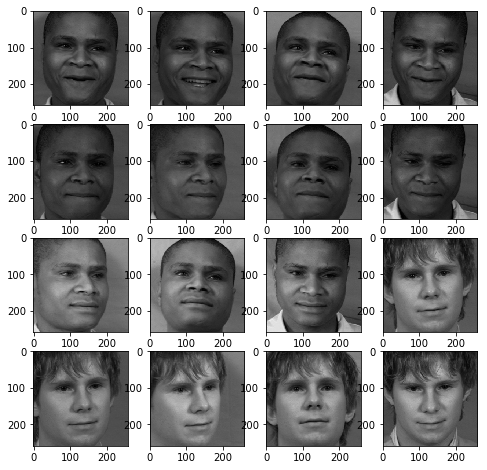

In [61]:
import math
images_errors = np.random.random([len(errors),259,259,3]) 
for i in range(len(errors)):
    images_errors[i] = image[errors[i][0]]

w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = int(math.sqrt(len(errors)))
rows =int(math.sqrt(len(errors)))
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(images_errors[i-1].astype('uint8'))
plt.show()


In [62]:
import os
from matplotlib import pyplot as plt
import glob
import cv2
import numpy as np
imageCollection = []
image_sized = np.random.random([245,64,64,3])
image = [cv2.imread(file) for file in glob.glob("./data/test/female/*.jpg")]
# plt.imshow(image[0])
for i in range(245):  
    image_sized[i] = cv2.resize(image[i], (64,64))
predict = model.predict(image_sized)

0.8285714285714286


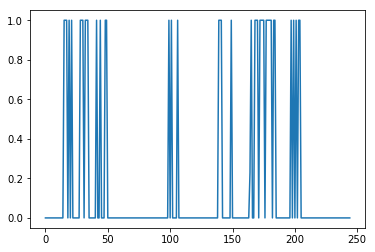

In [63]:
count = 0
errors=[0]*245
errors = np.array(errors)

# for i in predict:
#     if i[0] >0.5:
#         count=count+1
for i in range(245):
    if predict[i]<0.5:
        count = count+1
    else: 
        errors[i] = i
errors = np.argwhere(errors)
print(count/245)
plt.plot(predict)

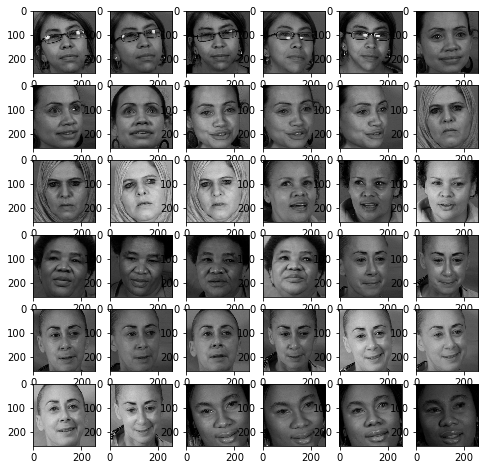

In [64]:
import math
images_errors = np.random.random([len(errors),259,259,3]) 
for i in range(len(errors)):
    images_errors[i] = image[errors[i][0]]

w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = int(math.sqrt(len(errors)))
rows =int(math.sqrt(len(errors)))
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(images_errors[i-1].astype('uint8'))
plt.show()

# Prepearing Testing Data

In [130]:
folders =['a','b']
image_generator = []
for folder in folders:
    images = ((file, cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2GRAY)) for file in glob.glob(f"./test/{folder}/*.jpg"))
    
    image_generators.append(images)
# image = cv2.cvtColor(cv2.imread("./test/87959706_2427340897579353_5615452633218154496_n.jpg"),cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+ 'haarcascade_frontalface_default.xml')
eyes_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')
for generator_num, image_generator in zip(range(len(folders)), image_generators):
    
    for (file_name, image) in zip(range(751), image_generator):
        print(image)
        if generator_num==0:
            scale_factor =6.2
            min_Neighbors=8
        else:
            scale_factor =2.2
            min_Neighbors=4
        print("hey")
        [x, y, w, h] = face_cascade.detectMultiScale(image, scaleFactor=scale_factor, minNeighbors=min_Neighbors)
        cv2.imwrite(f'./{file_name}.jpg', image[ y-2+1:y+h+2, x-2+1:x+w+2])
# print(face_cascade.detectMultiScale(image, scaleFactor=scale_factor, minNeighbors=min_Neighbors))
# for x, y, w, h in face_cascade.detectMultiScale(image, scaleFactor=scale_factor, minNeighbors=min_Neighbors):
#     cv2.imwrite(f'./1.jpg', image[ y-2+1:y+h+2, x-2+1:x+w+2])
#     print(x,y,w,h)
#     plt.imshow(image[ y-2+8:y+h+8, x-2+8:x+w+8])

In [61]:
import os
from matplotlib import pyplot as plt
import glob
import cv2
import numpy as np
imageCollection = []
image_sized = np.random.random([34,64,64,3])
image = [cv2.imread(file) for file in glob.glob("./test/*.jpg")]
for i in range(34):  
    image_sized[i] = cv2.resize(image[i], (64,64))
predict = model.predict(image_sized)

ValueError: Error when checking input: expected conv2d_18_input to have shape (50, 50, 3) but got array with shape (64, 64, 3)

In [ ]:
import os
from matplotlib import pyplot as plt
import glob
import cv2
import numpy as np
imageCollection = []
image_sized = np.random.random([34,64,64,3])
image = [cv2.imread(file) for file in glob.glob("./test/*.jpg")]
for i in range(34):  
    image_sized[i] = cv2.resize(image[i], (64,64))
predict = model.predict(image_sized)
count = 0
errors=[0]*245
errors = np.array(errors)

# for i in predict:
#     if i[0] >0.5:
#         count=count+1
for i in range(34):
    if predict[i]>0.5:
        count = count+1
    else: 
        errors[i] = i
errors = np.argwhere(errors)
print(count/34)
plt.plot(predict)

0.7058823529411765


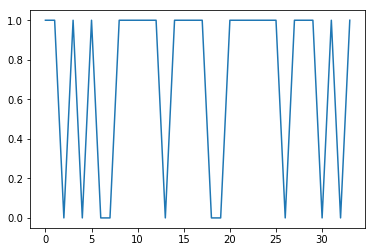

In [84]:
count = 0
errors=[0]*245
errors = np.array(errors)

# for i in predict:
#     if i[0] >0.5:
#         count=count+1
for i in range(34):
    if predict[i]>0.5:
        count = count+1
    else: 
        errors[i] = i
errors = np.argwhere(errors)
print(count/34)
plt.plot(predict)

# Detected as Men

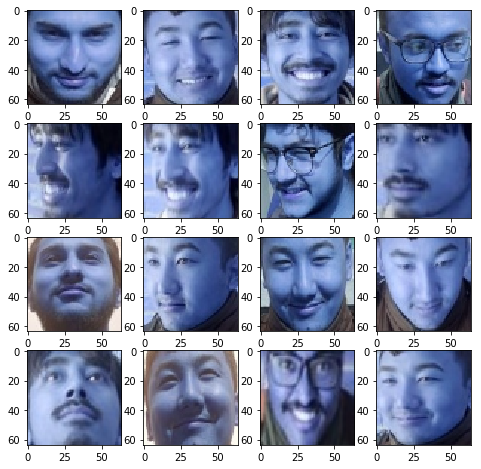

In [82]:
import math
images_errors = np.random.random([len(errors),64,64,3]) 
for i in range(len(errors)):
    images_errors[i] = image_sized[errors[i][0]]

w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = int(math.sqrt(len(errors)))
rows =int(math.sqrt(len(errors)))
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(images_errors[i-1].astype('uint8'))
plt.show()

# Detected as Female

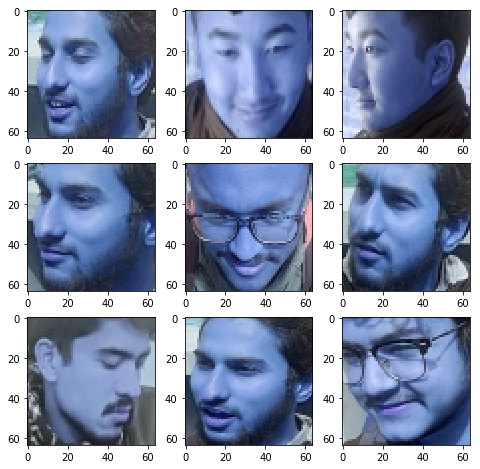

In [80]:
import math
images_errors = np.random.random([len(errors),64,64,3]) 
for i in range(len(errors)):
    images_errors[i] = image_sized[errors[i][0]]

w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = int(math.sqrt(len(errors)))
rows =int(math.sqrt(len(errors)))
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(images_errors[i-1].astype('uint8'))
plt.show()

In [3]:
input_size = [64,64]
batch_size = 32
steps_per_epoch =100






train_datagen = ImageDataGenerator(
        rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    './data/train',
    target_size=(50,50),
    batch_size=32,
    class_mode='binary',
    interpolation='bilinear')
validation_generator = test_datagen.flow_from_directory(
        './data/validation',
        target_size=(50, 50),
        batch_size=32,
        class_mode='binary',
        interpolation='bilinear')




Found 2582 images belonging to 2 classes.
Found 348 images belonging to 2 classes.


In [4]:
model = Sequential()
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(50,50,3)))
model.add(MaxPool2D((2,2)))
model.add(Flatten())

model.add(Dense(1,activation='sigmoid'))


model.compile(loss='binary_crossentropy',optimizer = 'Adam',metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 128)       3584      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 73728)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 73729     
Total params: 77,313
Trainable params: 77,313
Non-trainable params: 0
_________________________________________________________________


In [6]:
num_epochs = 100
steps_per_epochs = 90
validiaton_steps=12
history = model.fit_generator(
    train_generator,
    steps_per_epoch=90,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=11)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
90/90 [==============================] - 109s 1s/step - loss: 0.5085 - acc: 0.7659 - val_loss: 0.7266 - val_acc: 0.6868
Epoch 2/10
90/90 [==============================] - 25s 278ms/step - loss: 0.3416 - acc: 0.8559 - val_loss: 0.3446 - val_acc: 0.8592
Epoch 3/10
90/90 [==============================] - 26s 284ms/step - loss: 0.2350 - acc: 0.9092 - val_loss: 0.2933 - val_acc: 0.8621
Epoch 4/10
90/90 [==============================] - 25s 281ms/step - loss: 0.1829 - acc: 0.9375 - val_loss: 0.2546 - val_acc: 0.8937
Epoch 5/10
29/90 [========>.....................] - ETA: 15s - loss: 0.1475 - acc: 0.9526

KeyboardInterrupt: 

In [7]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [8]:
import os
from matplotlib import pyplot as plt
import glob
import cv2
import numpy as np
imageCollection = []
image_sized = np.random.random([245,50,50,3])
image = [cv2.imread(file) for file in glob.glob("./data/test/female/*.jpg")]
# plt.imshow(image[0])
for i in range(245):  
    image_sized[i] = cv2.resize(image[i], (50,50))
predict = model.predict(image_sized)

0.8367346938775511


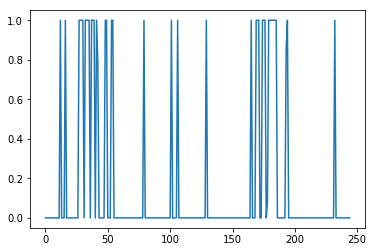

In [9]:
count = 0
errors=[0]*245
errors = np.array(errors)

# for i in predict:
#     if i[0] >0.5:
#         count=count+1
for i in range(245):
    if predict[i]<0.5:
        count = count+1
    else: 
        errors[i] = i
errors = np.argwhere(errors)
print(count/245)
plt.plot(predict)

In [5]:
import os
from matplotlib import pyplot as plt
import glob
import cv2
import numpy as np
imageCollection = []
image_sized = np.random.random([172,50,50,3])
image = [cv2.imread(file) for file in glob.glob("./data/test/male/*.jpg")]
# plt.imshow(image[0])
for i in range(172):  
    image_sized[i] = cv2.resize(image[i], (50,50))
predict = model.predict(image_sized)


NameError: name 'model' is not defined

0.9011627906976745


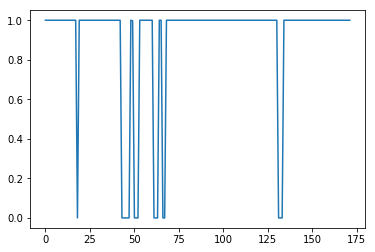

In [11]:
count = 0
errors=[0]*245
errors = np.array(errors)

# for i in predict:
#     if i[0] >0.5:
#         count=count+1
for i in range(172):
    if predict[i]>0.5:
        count = count+1
    else: 
        errors[i] = i
errors = np.argwhere(errors)
print(count/172)
plt.plot(predict)

In [146]:
input_size = [64,64]
batch_size = 32
steps_per_epoch =100






train_datagen = ImageDataGenerator(
        rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    './data/train',
    target_size=(50,50),
    batch_size=2,
    class_mode='binary',
    interpolation='bilinear')
validation_generator = test_datagen.flow_from_directory(
        './data/validation',
        target_size=(50, 50),
        batch_size=2,
        class_mode='binary',
        interpolation='bilinear')

Found 2582 images belonging to 2 classes.
Found 348 images belonging to 2 classes.


In [147]:
model = Sequential()
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(50,50,3)))
model.add(MaxPool2D((2,2)))
model.add(Flatten())

model.add(Dense(1,activation='sigmoid'))


model.compile(loss='binary_crossentropy',optimizer = 'Adam',metrics=['accuracy'])


In [148]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_85 (Conv2D)           (None, 48, 48, 128)       3584      
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 24, 24, 128)       0         
_________________________________________________________________
flatten_40 (Flatten)         (None, 73728)             0         
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 73729     
Total params: 77,313
Trainable params: 77,313
Non-trainable params: 0
_________________________________________________________________


In [149]:
num_epochs = 100
steps_per_epochs = 90
validiaton_steps=12
history = model.fit_generator(
    train_generator,
    steps_per_epoch=90,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=11)

Epoch 1/10
90/90 [==============================] - 4s 45ms/step - loss: 0.6927 - acc: 0.5778 - val_loss: 0.5824 - val_acc: 0.7273
Epoch 2/10
90/90 [==============================] - 2s 22ms/step - loss: 0.4917 - acc: 0.7722 - val_loss: 0.5228 - val_acc: 0.7273
Epoch 3/10
90/90 [==============================] - 2s 21ms/step - loss: 0.4900 - acc: 0.8056 - val_loss: 0.5078 - val_acc: 0.7273
Epoch 4/10
90/90 [==============================] - 2s 19ms/step - loss: 0.3889 - acc: 0.8389 - val_loss: 0.9323 - val_acc: 0.5455
Epoch 5/10
90/90 [==============================] - 2s 19ms/step - loss: 0.3367 - acc: 0.8389 - val_loss: 0.4554 - val_acc: 0.8182
Epoch 6/10
90/90 [==============================] - 2s 19ms/step - loss: 0.3820 - acc: 0.8278 - val_loss: 0.5199 - val_acc: 0.6364
Epoch 7/10
90/90 [==============================] - 2s 19ms/step - loss: 0.3236 - acc: 0.8667 - val_loss: 0.7861 - val_acc: 0.5909
Epoch 8/10
90/90 [==============================] - 2s 19ms/step - loss: 0.3573 - a

0.7346938775510204


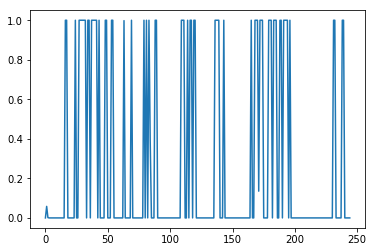

In [150]:
import os
from matplotlib import pyplot as plt
import glob
import cv2
import numpy as np
imageCollection = []
image_sized = np.random.random([245,50,50,3])
image = [cv2.imread(file) for file in glob.glob("./data/test/female/*.jpg")]
# plt.imshow(image[0])
for i in range(245):  
    image_sized[i] = cv2.resize(image[i], (50,50))
predict = model.predict(image_sized)
count = 0
errors=[0]*245
errors = np.array(errors)

# for i in predict:
#     if i[0] >0.5:
#         count=count+1
for i in range(245):
    if predict[i]<0.5:
        count = count+1
    else: 
        errors[i] = i
errors = np.argwhere(errors)
print(count/245)
plt.plot(predict)

0.9418604651162791


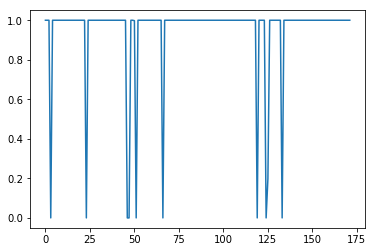

In [151]:
import os
from matplotlib import pyplot as plt
import glob
import cv2
import numpy as np
imageCollection = []
image_sized = np.random.random([172,50,50,3])
image = [cv2.imread(file) for file in glob.glob("./data/test/male/*.jpg")]
# plt.imshow(image[0])
for i in range(172):  
    image_sized[i] = cv2.resize(image[i], (50,50))
predict = model.predict(image_sized)
count = 0
errors=[0]*245
errors = np.array(errors)

# for i in predict:
#     if i[0] >0.5:
#         count=count+1
for i in range(172):
    if predict[i]>0.5:
        count = count+1
    else: 
        errors[i] = i
errors = np.argwhere(errors)
print(count/172)
plt.plot(predict)

In [92]:
input_size = [64,64]
batch_size = 32
steps_per_epoch =100






train_datagen = ImageDataGenerator(
        rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    './data/train',
    target_size=(50,50),
    batch_size=2,
    class_mode='binary',
    interpolation='bilinear')
validation_generator = test_datagen.flow_from_directory(
        './data/validation',
        target_size=(50, 50),
        batch_size=2,
        class_mode='binary',
        interpolation='bilinear')
model = Sequential()
model.add(Conv2D(30,(3,3),activation='relu',input_shape=(50,50,3)))
model.add(MaxPool2D((4,4)))
model.add(Flatten())

model.add(Dense(1,activation='sigmoid'))


model.compile(loss='binary_crossentropy',optimizer = 'Adam',metrics=['accuracy'])

model.summary()

num_epochs = 100
steps_per_epochs = 90
validiaton_steps=12
history = model.fit_generator(
    train_generator,
    steps_per_epoch=90,
    epochs=1000,
    validation_data=validation_generator,
    validation_steps=11)

Found 2582 images belonging to 2 classes.
Found 348 images belonging to 2 classes.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 48, 48, 30)        840       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 4320)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 4321      
Total params: 5,161
Trainable params: 5,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
90/90 [==============================] - 2s 18ms/step - loss: 0.6895 - acc: 0.5778 - val_loss: 0.6316 - val_acc: 0.6364
Epoch 2/1000
90/90 [==============================] - 1s

90/90 [==============================] - 1s 6ms/step - loss: 0.1512 - acc: 0.9444 - val_loss: 0.5950 - val_acc: 0.6818
Epoch 56/1000
90/90 [==============================] - 1s 6ms/step - loss: 0.1047 - acc: 0.9667 - val_loss: 0.2550 - val_acc: 0.8636
Epoch 57/1000
90/90 [==============================] - 1s 7ms/step - loss: 0.0881 - acc: 0.9667 - val_loss: 0.1297 - val_acc: 0.9545
Epoch 58/1000
90/90 [==============================] - 1s 7ms/step - loss: 0.1480 - acc: 0.9444 - val_loss: 0.0914 - val_acc: 1.0000
Epoch 59/1000
90/90 [==============================] - 1s 7ms/step - loss: 0.0671 - acc: 0.9833 - val_loss: 0.2555 - val_acc: 0.8182
Epoch 60/1000
90/90 [==============================] - 1s 8ms/step - loss: 0.1139 - acc: 0.9667 - val_loss: 0.1089 - val_acc: 1.0000
Epoch 61/1000
90/90 [==============================] - 1s 6ms/step - loss: 0.0669 - acc: 0.9889 - val_loss: 0.3735 - val_acc: 0.8636
Epoch 62/1000
90/90 [==============================] - 1s 7ms/step - loss: 0.0884 -

90/90 [==============================] - 1s 6ms/step - loss: 0.0431 - acc: 0.9889 - val_loss: 0.2179 - val_acc: 0.8636
Epoch 117/1000
90/90 [==============================] - 1s 7ms/step - loss: 0.0354 - acc: 0.9944 - val_loss: 0.6234 - val_acc: 0.8636
Epoch 118/1000
90/90 [==============================] - 1s 7ms/step - loss: 0.0357 - acc: 0.9944 - val_loss: 0.0861 - val_acc: 0.9545
Epoch 119/1000
90/90 [==============================] - 1s 6ms/step - loss: 0.0451 - acc: 0.9889 - val_loss: 0.2331 - val_acc: 0.9545
Epoch 120/1000
90/90 [==============================] - 1s 7ms/step - loss: 0.0311 - acc: 0.9944 - val_loss: 0.1520 - val_acc: 0.9091
Epoch 121/1000
90/90 [==============================] - 1s 6ms/step - loss: 0.0703 - acc: 0.9722 - val_loss: 0.6142 - val_acc: 0.8182
Epoch 122/1000
90/90 [==============================] - 1s 7ms/step - loss: 0.0775 - acc: 0.9778 - val_loss: 0.2658 - val_acc: 0.9091
Epoch 123/1000
90/90 [==============================] - 1s 8ms/step - loss: 0

90/90 [==============================] - 1s 8ms/step - loss: 0.0235 - acc: 0.9944 - val_loss: 0.3824 - val_acc: 0.9091
Epoch 177/1000
90/90 [==============================] - 1s 8ms/step - loss: 0.0364 - acc: 0.9889 - val_loss: 0.3187 - val_acc: 0.9545
Epoch 178/1000
90/90 [==============================] - 1s 8ms/step - loss: 0.0150 - acc: 1.0000 - val_loss: 0.3622 - val_acc: 0.8636
Epoch 179/1000
90/90 [==============================] - 1s 7ms/step - loss: 0.0265 - acc: 0.9889 - val_loss: 0.4142 - val_acc: 0.9091
Epoch 180/1000
90/90 [==============================] - 1s 9ms/step - loss: 0.0180 - acc: 1.0000 - val_loss: 0.1844 - val_acc: 0.9091
Epoch 181/1000
90/90 [==============================] - 1s 7ms/step - loss: 0.0245 - acc: 0.9944 - val_loss: 0.5715 - val_acc: 0.8636
Epoch 182/1000
90/90 [==============================] - 1s 9ms/step - loss: 0.0470 - acc: 0.9889 - val_loss: 0.1143 - val_acc: 0.9091
Epoch 183/1000
90/90 [==============================] - 1s 7ms/step - loss: 0

90/90 [==============================] - 1s 7ms/step - loss: 0.0097 - acc: 1.0000 - val_loss: 0.3612 - val_acc: 0.8636
Epoch 238/1000
90/90 [==============================] - 1s 7ms/step - loss: 0.0071 - acc: 1.0000 - val_loss: 0.2457 - val_acc: 0.9545
Epoch 239/1000
90/90 [==============================] - 1s 6ms/step - loss: 0.0067 - acc: 1.0000 - val_loss: 0.6512 - val_acc: 0.7727
Epoch 240/1000
90/90 [==============================] - 1s 6ms/step - loss: 0.0138 - acc: 1.0000 - val_loss: 0.3261 - val_acc: 0.8636
Epoch 241/1000
90/90 [==============================] - 1s 6ms/step - loss: 0.0214 - acc: 0.9889 - val_loss: 0.6870 - val_acc: 0.8182
Epoch 242/1000
90/90 [==============================] - 1s 6ms/step - loss: 0.0199 - acc: 1.0000 - val_loss: 0.1884 - val_acc: 0.9091
Epoch 243/1000
90/90 [==============================] - 1s 6ms/step - loss: 0.0211 - acc: 0.9889 - val_loss: 0.3865 - val_acc: 0.8636
Epoch 244/1000
90/90 [==============================] - 1s 6ms/step - loss: 0

90/90 [==============================] - 1s 9ms/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.2031 - val_acc: 0.8636
Epoch 299/1000
90/90 [==============================] - 1s 8ms/step - loss: 0.0170 - acc: 0.9944 - val_loss: 0.4301 - val_acc: 0.9091
Epoch 300/1000
90/90 [==============================] - 1s 9ms/step - loss: 0.0257 - acc: 0.9889 - val_loss: 0.6957 - val_acc: 0.8636
Epoch 301/1000
90/90 [==============================] - 1s 7ms/step - loss: 0.0119 - acc: 1.0000 - val_loss: 0.4286 - val_acc: 0.8636
Epoch 302/1000
90/90 [==============================] - ETA: 0s - loss: 0.0077 - acc: 1.000 - 1s 8ms/step - loss: 0.0072 - acc: 1.0000 - val_loss: 0.3256 - val_acc: 0.9545
Epoch 303/1000
90/90 [==============================] - 1s 8ms/step - loss: 0.0098 - acc: 1.0000 - val_loss: 0.4380 - val_acc: 0.9091
Epoch 304/1000
90/90 [==============================] - 1s 6ms/step - loss: 0.0072 - acc: 1.0000 - val_loss: 0.1489 - val_acc: 0.9545
Epoch 305/1000
90/90 [=================

Epoch 359/1000
90/90 [==============================] - 1s 8ms/step - loss: 0.0040 - acc: 1.0000 - val_loss: 0.8650 - val_acc: 0.8636
Epoch 360/1000
90/90 [==============================] - 1s 11ms/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.0132 - val_acc: 1.0000
Epoch 361/1000
90/90 [==============================] - 1s 6ms/step - loss: 0.0044 - acc: 1.0000 - val_loss: 0.4340 - val_acc: 0.9091
Epoch 362/1000
90/90 [==============================] - 1s 7ms/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.7349 - val_acc: 0.8636
Epoch 363/1000
90/90 [==============================] - 1s 6ms/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.0088 - val_acc: 1.0000
Epoch 364/1000
90/90 [==============================] - 1s 10ms/step - loss: 0.0043 - acc: 1.0000 - val_loss: 0.0805 - val_acc: 0.9545
Epoch 365/1000
90/90 [==============================] - 1s 9ms/step - loss: 0.0067 - acc: 1.0000 - val_loss: 0.7098 - val_acc: 0.8182
Epoch 366/1000
90/90 [==============================] - 1s 7

90/90 [==============================] - 1s 7ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.4492 - val_acc: 0.9091
Epoch 420/1000
90/90 [==============================] - 1s 8ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.8269 - val_acc: 0.8636
Epoch 421/1000
90/90 [==============================] - 1s 7ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.3580 - val_acc: 0.9545
Epoch 422/1000
90/90 [==============================] - 1s 6ms/step - loss: 4.1713e-04 - acc: 1.0000 - val_loss: 0.3765 - val_acc: 0.9091
Epoch 423/1000
90/90 [==============================] - 1s 7ms/step - loss: 7.9118e-04 - acc: 1.0000 - val_loss: 0.9804 - val_acc: 0.8636
Epoch 424/1000
90/90 [==============================] - 1s 6ms/step - loss: 9.7738e-04 - acc: 1.0000 - val_loss: 0.5196 - val_acc: 0.8636
Epoch 425/1000
90/90 [==============================] - 1s 7ms/step - loss: 7.4743e-04 - acc: 1.0000 - val_loss: 0.0167 - val_acc: 1.0000
Epoch 426/1000
90/90 [==============================] - 1s 9m

90/90 [==============================] - 1s 9ms/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.7341 - val_acc: 0.9545
Epoch 480/1000
90/90 [==============================] - 1s 8ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.8090 - val_acc: 0.9091
Epoch 481/1000
90/90 [==============================] - 1s 11ms/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.5187 - val_acc: 0.7727
Epoch 482/1000
90/90 [==============================] - 1s 12ms/step - loss: 0.0121 - acc: 0.9944 - val_loss: 0.1494 - val_acc: 0.9545
Epoch 483/1000
90/90 [==============================] - 1s 9ms/step - loss: 0.1463 - acc: 0.9611 - val_loss: 0.2487 - val_acc: 0.9091
Epoch 484/1000
90/90 [==============================] - 1s 8ms/step - loss: 0.0458 - acc: 0.9833 - val_loss: 0.4684 - val_acc: 0.9545
Epoch 485/1000
90/90 [==============================] - 1s 7ms/step - loss: 0.0192 - acc: 0.9944 - val_loss: 0.2165 - val_acc: 0.9545
Epoch 486/1000
90/90 [==============================] - 1s 8ms/step - loss:

90/90 [==============================] - 1s 8ms/step - loss: 2.4935e-04 - acc: 1.0000 - val_loss: 0.0630 - val_acc: 0.9545
Epoch 540/1000
90/90 [==============================] - 1s 8ms/step - loss: 4.0370e-04 - acc: 1.0000 - val_loss: 0.3337 - val_acc: 0.9545
Epoch 541/1000
90/90 [==============================] - 1s 8ms/step - loss: 5.0773e-04 - acc: 1.0000 - val_loss: 0.2458 - val_acc: 0.9545
Epoch 542/1000
90/90 [==============================] - 1s 8ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0060 - val_acc: 1.0000
Epoch 543/1000
90/90 [==============================] - 1s 7ms/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.0485 - val_acc: 0.9545
Epoch 544/1000
90/90 [==============================] - 1s 8ms/step - loss: 0.0314 - acc: 0.9778 - val_loss: 0.9900 - val_acc: 0.7727
Epoch 545/1000
90/90 [==============================] - 1s 9ms/step - loss: 0.1145 - acc: 0.9556 - val_loss: 1.1411 - val_acc: 0.6818
Epoch 546/1000
90/90 [==============================] - 1s 8ms/st

90/90 [==============================] - 1s 7ms/step - loss: 7.1308e-04 - acc: 1.0000 - val_loss: 0.0241 - val_acc: 1.0000
Epoch 599/1000
90/90 [==============================] - 1s 9ms/step - loss: 3.4913e-04 - acc: 1.0000 - val_loss: 1.0559 - val_acc: 0.8636
Epoch 600/1000
90/90 [==============================] - 1s 7ms/step - loss: 4.5738e-04 - acc: 1.0000 - val_loss: 0.1217 - val_acc: 0.9545
Epoch 601/1000
90/90 [==============================] - 1s 8ms/step - loss: 7.8216e-04 - acc: 1.0000 - val_loss: 0.6504 - val_acc: 0.8636
Epoch 602/1000
90/90 [==============================] - 1s 8ms/step - loss: 0.0595 - acc: 0.9833 - val_loss: 0.8702 - val_acc: 0.8182
Epoch 603/1000
90/90 [==============================] - 1s 7ms/step - loss: 0.0341 - acc: 0.9833 - val_loss: 1.2055 - val_acc: 0.8636
Epoch 604/1000
90/90 [==============================] - 1s 8ms/step - loss: 0.0096 - acc: 1.0000 - val_loss: 0.0278 - val_acc: 1.0000
Epoch 605/1000
90/90 [==============================] - 1s 7m

90/90 [==============================] - 1s 9ms/step - loss: 9.5294e-05 - acc: 1.0000 - val_loss: 0.5202 - val_acc: 0.8636
Epoch 658/1000
90/90 [==============================] - 1s 10ms/step - loss: 3.0827e-04 - acc: 1.0000 - val_loss: 0.1739 - val_acc: 0.9091
Epoch 659/1000
90/90 [==============================] - 1s 9ms/step - loss: 0.0958 - acc: 0.9667 - val_loss: 0.4084 - val_acc: 0.9091
Epoch 660/1000
90/90 [==============================] - 1s 7ms/step - loss: 0.0165 - acc: 0.9944 - val_loss: 0.6998 - val_acc: 0.9091
Epoch 661/1000
90/90 [==============================] - 1s 9ms/step - loss: 0.0688 - acc: 0.9778 - val_loss: 1.3823 - val_acc: 0.7727
Epoch 662/1000
90/90 [==============================] - 1s 7ms/step - loss: 0.0032 - acc: 1.0000 - val_loss: 1.4669 - val_acc: 0.8182
Epoch 663/1000
90/90 [==============================] - 1s 6ms/step - loss: 0.0056 - acc: 1.0000 - val_loss: 0.4358 - val_acc: 0.9091
Epoch 664/1000
90/90 [==============================] - 1s 7ms/step 

90/90 [==============================] - 1s 7ms/step - loss: 3.2600e-04 - acc: 1.0000 - val_loss: 0.6156 - val_acc: 0.9545
Epoch 717/1000
90/90 [==============================] - 1s 7ms/step - loss: 2.6221e-04 - acc: 1.0000 - val_loss: 0.3164 - val_acc: 0.9545
Epoch 718/1000
90/90 [==============================] - 1s 7ms/step - loss: 2.4386e-04 - acc: 1.0000 - val_loss: 0.8989 - val_acc: 0.9091
Epoch 719/1000
90/90 [==============================] - 1s 7ms/step - loss: 1.4845e-04 - acc: 1.0000 - val_loss: 0.3054 - val_acc: 0.9091
Epoch 720/1000
90/90 [==============================] - 1s 7ms/step - loss: 1.7362e-04 - acc: 1.0000 - val_loss: 0.0340 - val_acc: 0.9545
Epoch 721/1000
90/90 [==============================] - 1s 7ms/step - loss: 3.3526e-04 - acc: 1.0000 - val_loss: 0.3060 - val_acc: 0.8636
Epoch 722/1000
90/90 [==============================] - 1s 7ms/step - loss: 4.2611e-04 - acc: 1.0000 - val_loss: 1.0548 - val_acc: 0.8636
Epoch 723/1000
90/90 [===========================

90/90 [==============================] - 1s 7ms/step - loss: 3.2162e-04 - acc: 1.0000 - val_loss: 0.3928 - val_acc: 0.9545
Epoch 776/1000
90/90 [==============================] - 1s 6ms/step - loss: 2.1787e-04 - acc: 1.0000 - val_loss: 0.3525 - val_acc: 0.8636
Epoch 777/1000
90/90 [==============================] - 1s 7ms/step - loss: 1.7995e-04 - acc: 1.0000 - val_loss: 0.9722 - val_acc: 0.9091
Epoch 778/1000
90/90 [==============================] - 1s 7ms/step - loss: 7.9488e-05 - acc: 1.0000 - val_loss: 0.4185 - val_acc: 0.9545
Epoch 779/1000
90/90 [==============================] - 1s 7ms/step - loss: 1.6871e-04 - acc: 1.0000 - val_loss: 0.9161 - val_acc: 0.9091
Epoch 780/1000
90/90 [==============================] - 1s 7ms/step - loss: 1.1689e-04 - acc: 1.0000 - val_loss: 0.2751 - val_acc: 0.9545
Epoch 781/1000
90/90 [==============================] - 1s 7ms/step - loss: 2.0537e-04 - acc: 1.0000 - val_loss: 0.0628 - val_acc: 0.9545
Epoch 782/1000
90/90 [===========================

90/90 [==============================] - 1s 7ms/step - loss: 2.9709e-04 - acc: 1.0000 - val_loss: 0.6985 - val_acc: 0.9091
Epoch 835/1000
90/90 [==============================] - 1s 7ms/step - loss: 1.1966e-04 - acc: 1.0000 - val_loss: 0.0098 - val_acc: 1.0000
Epoch 836/1000
90/90 [==============================] - 1s 7ms/step - loss: 4.4421e-04 - acc: 1.0000 - val_loss: 0.4528 - val_acc: 0.9091
Epoch 837/1000
90/90 [==============================] - 1s 8ms/step - loss: 3.6622e-04 - acc: 1.0000 - val_loss: 0.1255 - val_acc: 0.9091
Epoch 838/1000
90/90 [==============================] - 1s 7ms/step - loss: 1.0681e-04 - acc: 1.0000 - val_loss: 0.8533 - val_acc: 0.8636
Epoch 839/1000
90/90 [==============================] - 1s 8ms/step - loss: 5.5964e-04 - acc: 1.0000 - val_loss: 0.0044 - val_acc: 1.0000
Epoch 840/1000
90/90 [==============================] - 1s 7ms/step - loss: 1.9443e-04 - acc: 1.0000 - val_loss: 0.4577 - val_acc: 0.9091
Epoch 841/1000
90/90 [===========================

90/90 [==============================] - 1s 7ms/step - loss: 7.2782e-05 - acc: 1.0000 - val_loss: 0.1391 - val_acc: 0.9545
Epoch 894/1000
90/90 [==============================] - 1s 7ms/step - loss: 7.7582e-05 - acc: 1.0000 - val_loss: 0.9063 - val_acc: 0.8636
Epoch 895/1000
90/90 [==============================] - 1s 7ms/step - loss: 1.3919e-04 - acc: 1.0000 - val_loss: 0.1807 - val_acc: 0.9545
Epoch 896/1000
90/90 [==============================] - 1s 7ms/step - loss: 1.1050e-04 - acc: 1.0000 - val_loss: 0.5723 - val_acc: 0.8636
Epoch 897/1000
90/90 [==============================] - 1s 7ms/step - loss: 1.2979e-04 - acc: 1.0000 - val_loss: 0.9021 - val_acc: 0.9091
Epoch 898/1000
90/90 [==============================] - 1s 7ms/step - loss: 1.1436e-04 - acc: 1.0000 - val_loss: 0.4880 - val_acc: 0.9545
Epoch 899/1000
90/90 [==============================] - 1s 7ms/step - loss: 2.0593e-04 - acc: 1.0000 - val_loss: 0.0226 - val_acc: 1.0000
Epoch 900/1000
90/90 [===========================

90/90 [==============================] - 1s 7ms/step - loss: 1.1049e-04 - acc: 1.0000 - val_loss: 0.0422 - val_acc: 1.0000
Epoch 953/1000
90/90 [==============================] - 1s 6ms/step - loss: 1.8506e-04 - acc: 1.0000 - val_loss: 1.1433 - val_acc: 0.8636
Epoch 954/1000
90/90 [==============================] - 1s 6ms/step - loss: 1.1349e-04 - acc: 1.0000 - val_loss: 0.7367 - val_acc: 0.9545
Epoch 955/1000
90/90 [==============================] - 1s 6ms/step - loss: 2.4472e-04 - acc: 1.0000 - val_loss: 0.2824 - val_acc: 0.9091
Epoch 956/1000
90/90 [==============================] - 1s 6ms/step - loss: 1.2231e-04 - acc: 1.0000 - val_loss: 1.2204 - val_acc: 0.8182
Epoch 957/1000
90/90 [==============================] - 1s 6ms/step - loss: 6.7621e-05 - acc: 1.0000 - val_loss: 0.7146 - val_acc: 0.8636
Epoch 958/1000
90/90 [==============================] - 1s 7ms/step - loss: 1.3397e-04 - acc: 1.0000 - val_loss: 0.2462 - val_acc: 0.9545
Epoch 959/1000
90/90 [===========================

0.8953488372093024


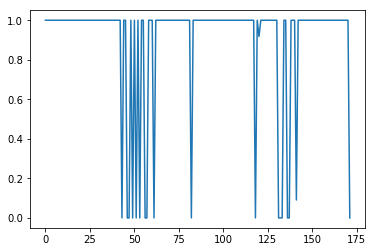

In [93]:
import os
from matplotlib import pyplot as plt
import glob
import cv2
import numpy as np
imageCollection = []
image_sized = np.random.random([172,50,50,3])
image = [cv2.imread(file) for file in glob.glob("./data/test/male/*.jpg")]
# plt.imshow(image[0])
for i in range(172):  
    image_sized[i] = cv2.resize(image[i], (50,50))
predict = model.predict(image_sized)
count = 0
errors=[0]*245
errors = np.array(errors)

# for i in predict:
#     if i[0] >0.5:
#         count=count+1
for i in range(172):
    if predict[i]>0.5:
        count = count+1
    else: 
        errors[i] = i
errors = np.argwhere(errors)
print(count/172)
plt.plot(predict)

0.8163265306122449


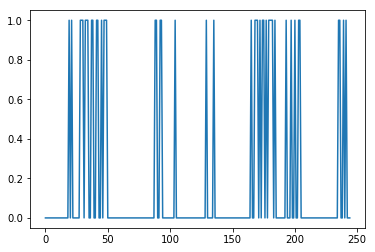

In [94]:
import os
from matplotlib import pyplot as plt
import glob
import cv2
import numpy as np
imageCollection = []
image_sized = np.random.random([245,50,50,3])
image = [cv2.imread(file) for file in glob.glob("./data/test/female/*.jpg")]
# plt.imshow(image[0])
for i in range(245):  
    image_sized[i] = cv2.resize(image[i], (50,50))
predict = model.predict(image_sized)
count = 0
errors=[0]*245
errors = np.array(errors)

# for i in predict:
#     if i[0] >0.5:
#         count=count+1
for i in range(245):
    if predict[i]<0.5:
        count = count+1
    else: 
        errors[i] = i
errors = np.argwhere(errors)
print(count/245)
plt.plot(predict)

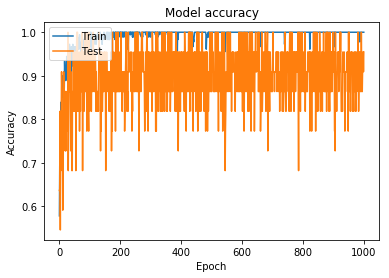

In [95]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [155]:
input_size = [64,64]
batch_size = 32
steps_per_epoch =100

import keras_metrics





train_datagen = ImageDataGenerator(
        rescale=1./2555)
test_datagen = ImageDataGenerator(rescale=1./2555)
train_generator = train_datagen.flow_from_directory(
    './data/train',
    target_size=(24,24),
    batch_size=2,
    class_mode='binary',
    interpolation='bilinear')
validation_generator = test_datagen.flow_from_directory(
        './data/validation',
        target_size=(24, 24),
        batch_size=2,
        class_mode='binary',
        interpolation='bilinear')
model = Sequential()
model.add(Conv2D(30,(20,20),activation='relu',input_shape=(24,24,3)))
model.add(MaxPool2D((4,4)))
model.add(Flatten())




model.add(Dense(1,activation='sigmoid'))


model.compile(optimizer="sgd",
              loss="binary_crossentropy",
              metrics=[keras.metrics.Precision(), keras.metrics.Recall()])

model.summary()

num_epochs = 100
steps_per_epochs = 90
validiaton_steps=12
history = model.fit_generator(
    train_generator,
    steps_per_epoch=90,
    epochs=40,
    validation_data=validation_generator,
    validation_steps=11)
import os
from matplotlib import pyplot as plt
import glob
import cv2
import numpy as np
imageCollection = []
image_sized = np.random.random([172,24,24,3])
image = [cv2.imread(file) for file in glob.glob("./data/test/male/*.jpg")]
# plt.imshow(image[0])
for i in range(172):  
    image_sized[i] = cv2.resize(image[i], (24,24))
predict = model.predict(image_sized)
count = 0
errors=[0]*245
errors = np.array(errors)

# for i in predict:
#     if i[0] >0.5:
#         count=count+1
for i in range(172):
    if predict[i]>0.5:
        count = count+1
    else: 
        errors[i] = i
errors = np.argwhere(errors)
print(count/172)
plt.plot(predict)

ModuleNotFoundError: No module named 'keras_metrics'

0.8122448979591836


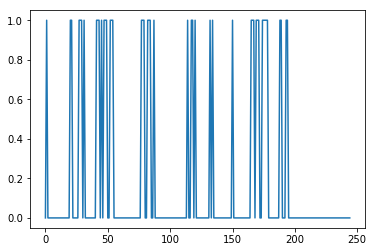

In [129]:
import os
from matplotlib import pyplot as plt
import glob
import cv2
import numpy as np
imageCollection = []
image_sized = np.random.random([245,24,24,3])
image = [cv2.imread(file) for file in glob.glob("./data/test/female/*.jpg")]
# plt.imshow(image[0])
for i in range(245):  
    image_sized[i] = cv2.resize(image[i], (24,24))
predict = model.predict(image_sized)
count = 0
errors=[0]*245
errors = np.array(errors)

# for i in predict:
#     if i[0] >0.5:
#         count=count+1
for i in range(245):
    if predict[i]<0.5:
        count = count+1
    else: 
        errors[i] = i
errors = np.argwhere(errors)
print(count/245)
plt.plot(predict)

0.8235294117647058


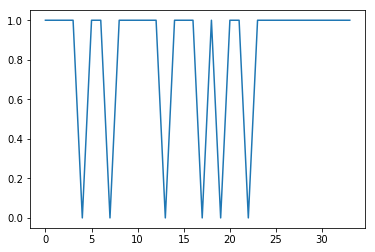

In [139]:
import os
from matplotlib import pyplot as plt
import glob
import cv2
import numpy as np
imageCollection = []
image_sized = np.random.random([34,24,24,3])
image = [cv2.imread(file) for file in glob.glob("./test/*.jpg")]
for i in range(34):  
    image_sized[i] = cv2.resize(image[i], (24,24))
predict = model.predict(image_sized)
count = 0
errors=[0]*245
errors = np.array(errors)

# for i in predict:
#     if i[0] >0.5:
#         count=count+1
for i in range(34):
    if predict[i]>0.5:
        count = count+1
    else: 
        errors[i] = i
errors = np.argwhere(errors)
print(count/34)
plt.plot(predict)

In [156]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


In [160]:
yhat_probs= model.predict(image_sized)
yhat_classes = model.predict_classes(image_sized)

yhat_probs = yhat_probs[:,0]
yhat_classes = yhat_classes[:,0]

In [161]:
# accuracy = accuracy_score(testy, yhat_classes)
# print('Accuracy: %f' % accuracy)
# # precision tp / (tp + fp)
precision = precision_score(image_sized, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(image_sized, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testy, yhat_classes)
print('F1 score: %f' % f1)
 

ValueError: Classification metrics can't handle a mix of unknown and binary targets